In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import kagglehub

## Importando Dataset

In [3]:
url = "https://raw.githubusercontent.com/Bruno-Venceslau/dataset-modelos_preditivos/refs/heads/main/Salary_dataset.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Analise Exploratória Datset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


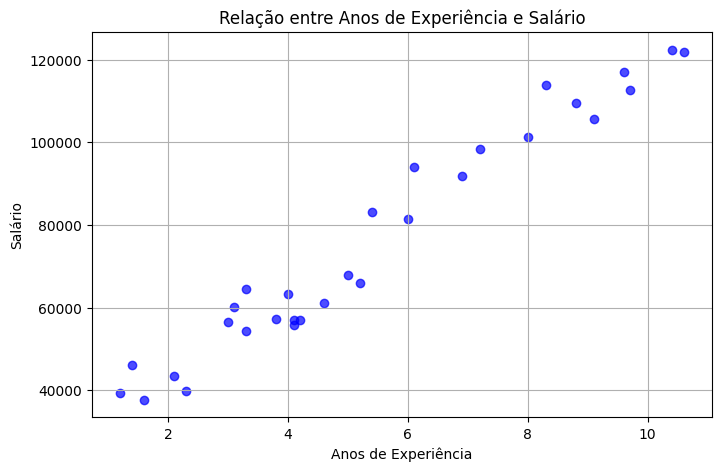

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', alpha=0.7)
plt.title('Relação entre Anos de Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

## Divisão Treino-Teste

In [8]:
X = df[['YearsExperience']]
y = df['Salary']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Treinando Modelo de Regressão Linear

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Fazer previsões

In [12]:
y_pred = lr.predict(X_test)

## Avaliando Modelo

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

Root Mean Squared Error (RMSE): 7059.04
R² Score: 0.9024


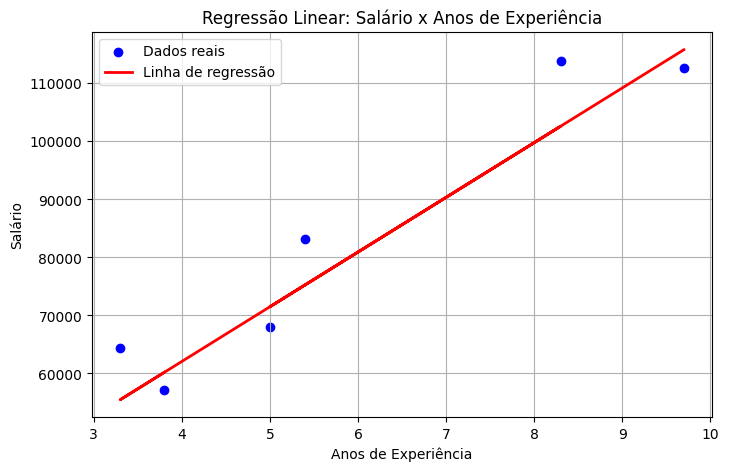

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.title('Regressão Linear: Salário x Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.grid(True)
plt.show()

## Conclusão

O modelo de regressão linear apresentou um R² de aproximadamente 0.90, indicando que ele explica 90% da variação nos salários a partir dos anos de experiência.
A linha de regressão obtida mostra uma relação positiva — quanto maior a experiência, maior o salário previsto.